In [38]:
from importlib import reload

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.integrate import solve_ivp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [39]:
import sys

custom_modules = [mod for mod in sys.modules if mod.startswith('utils.') or mod.startswith('neuronModels.')]
for module in custom_modules:
    del sys.modules[module]
from neuronModels.FitzhughNagumoModel import FitzhughNagumoModel
from neuronModels.GRUNetwork import GRUNetwork
from neuronModels.HybridModel import HybridModel
from neuronModels.IzhikevichModel import izhikevich_model
from neuronModels.LifModel import LifModel
from utils.Constants import Constants
from utils.DataHandler import DataHandler
from utils.Logger import Logger, LogLevel
from utils.Plotter import Plotter

logger = Logger()
logger.log("Libraries Built", LogLevel.INFO)

[2025-03-15 20:44:53] [INFO] Libraries Built


Dati di banchmark articolo [1]:


In [47]:
# FitzHugh-Nagumo Model

fn_model = FitzhughNagumoModel()
t_fn,sol_fn = fn_model._generate_synthetic_data(use_saved_models=True)

izh_model = izhikevich_model()
t_izh, data_izh = izh_model._generate_synthetic_data(use_saved_models=True)

lif_model = LifModel()
t_lif, v_lif = lif_model._generate_synthetic_data(use_saved_model=True)

[2025-03-15 20:58:50] [INFO] Instanitate Fitzhugh-Nagumo model
[2025-03-15 20:58:50] [INFO] Loaded data from neuronModels\SavedModels\_FitzhughNagumoModel\FitzhughNagumoModel.npz
[2025-03-15 20:58:50] [INFO] Instanitate izhikevich model
[2025-03-15 20:58:50] [INFO] Loaded data from neuronModels\SavedModels\_IzhikevicModel\IzhikevicModel.npz
[2025-03-15 20:58:50] [INFO] Instanitate LIF model
[2025-03-15 20:58:50] [INFO] Loaded data from neuronModels\SavedModels\_LifModel\LifModel.npz


In [48]:
models_data = {
    Constants.FN: (sol_fn, None),
    Constants.IZH: (data_izh, None),
    Constants.LIF: (v_lif,None)
}

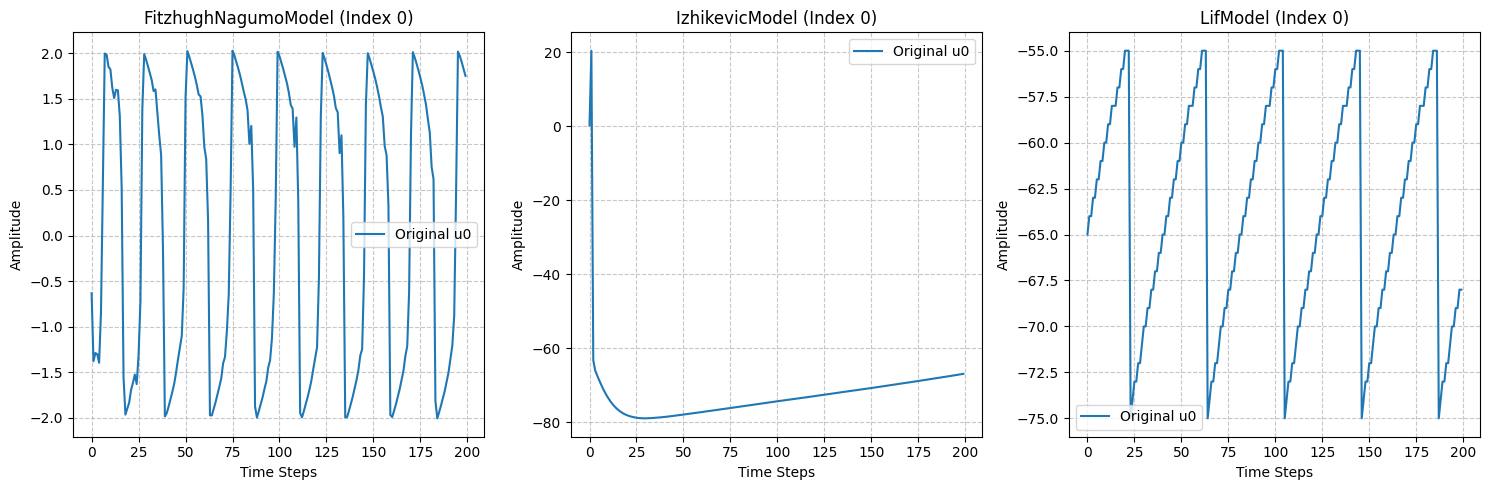

In [42]:
Plotter.plot_multiple_models(models_data)

Let's forecast Fitzhugh Nagumo:

In [49]:
hybrid_model = HybridModel()

In [50]:

x,y = DataHandler._prepare_data(sol_fn)
x_train, y_train, x_test, y_test = DataHandler._split_train_test(x,y)

In [51]:
x_error, y_error = DataHandler.create_error_sequences(model_data = sol_fn , true_data = sol_fn)
model_corrections = hybrid_model._create_gru(len(sol_fn[1]),len(sol_fn[1]), same_size = True)
optimizer = optim.Adam(model_corrections.parameters(), lr=0.001)
trained_model_corrections = hybrid_model._train(model_corrections,x_error,y_error,optimizer,epochs = 200 )
forecast = hybrid_model._forecast(trained_model_corrections, x_test, y_test, corrections=True)

[2025-03-15 20:59:10] [INFO] Created GRU network
[2025-03-15 20:59:10] [INFO] Training started..
[2025-03-15 20:59:15] [INFO] Epoch [20/200], Train Loss: 0.0002 
[2025-03-15 20:59:18] [INFO] Epoch [40/200], Train Loss: 0.0000 
[2025-03-15 20:59:22] [INFO] Epoch [60/200], Train Loss: 0.0000 
[2025-03-15 20:59:26] [INFO] Epoch [80/200], Train Loss: 0.0000 
[2025-03-15 20:59:30] [INFO] Epoch [100/200], Train Loss: 0.0000 
[2025-03-15 20:59:35] [INFO] Epoch [120/200], Train Loss: 0.0000 
[2025-03-15 20:59:39] [INFO] Epoch [140/200], Train Loss: 0.0000 
[2025-03-15 20:59:45] [INFO] Epoch [160/200], Train Loss: 0.0000 
[2025-03-15 20:59:56] [INFO] Epoch [180/200], Train Loss: 0.0000 
[2025-03-15 21:00:02] [INFO] Epoch [200/200], Train Loss: 0.0000 
[2025-03-15 21:00:02] [INFO] Training ended


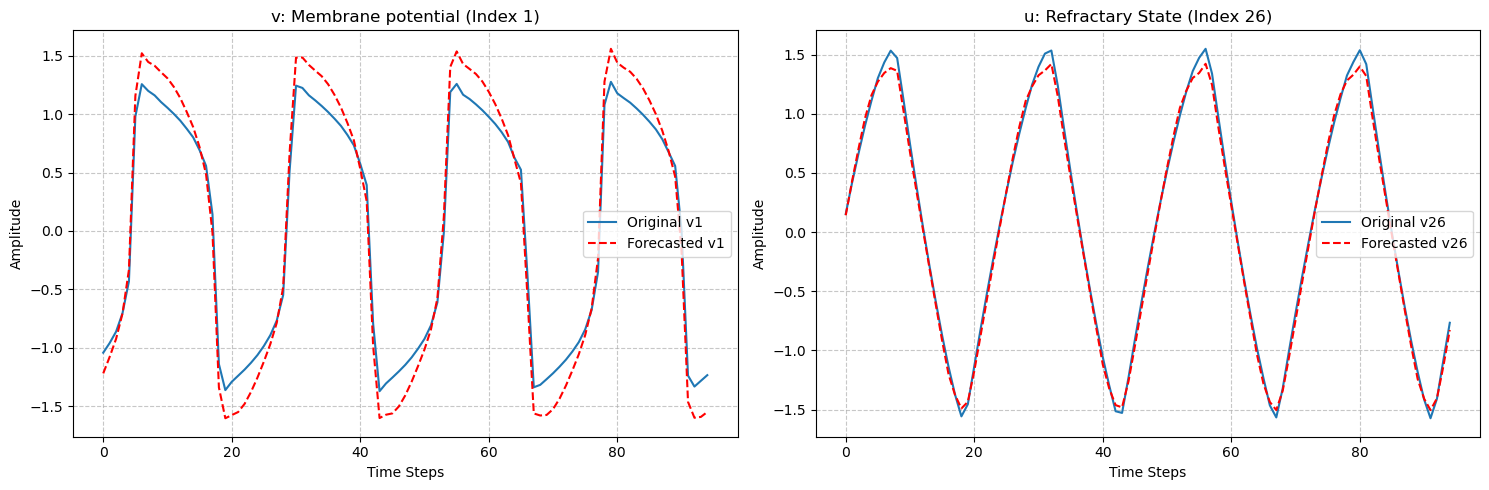

In [83]:
models_data = {
    "v: Membrane potential": (y_test, forecast),
    "u: Refractary State": (y_test, forecast)
}


indices = {
    "v: Membrane potential": 1,
    "u: Refractary State": 26
}

Plotter.plot_multiple_models(models_data, indices=indices, var_name='v')


Let's Forecast Izhikevic Model!

In [37]:
hybrid_model = HybridModel()
x,y = DataHandler._prepare_data(data_izh)
x_train, y_train, x_test, y_test = DataHandler._split_train_test(x,y)

AttributeError: type object 'DataHandler' has no attribute '_prepare_data'

In [36]:
x_error, y_error = DataHandler.create_error_sequences(model_data = data_izh , true_data = data_izh)
model_corrections = hybrid_model._create_gru(len(data_izh[1]),len(data_izh[1]), same_size = True)
optimizer = optim.Adam(model_corrections.parameters(), lr=0.001) 
trained_model_corrections = hybrid_model._train(model_corrections,x_error,y_error,optimizer,epochs = 200 )
forecast = hybrid_model._forecast(trained_model_corrections, x_test, y_test, corrections=True)

AttributeError: type object 'DataHandler' has no attribute 'create_error_sequences'

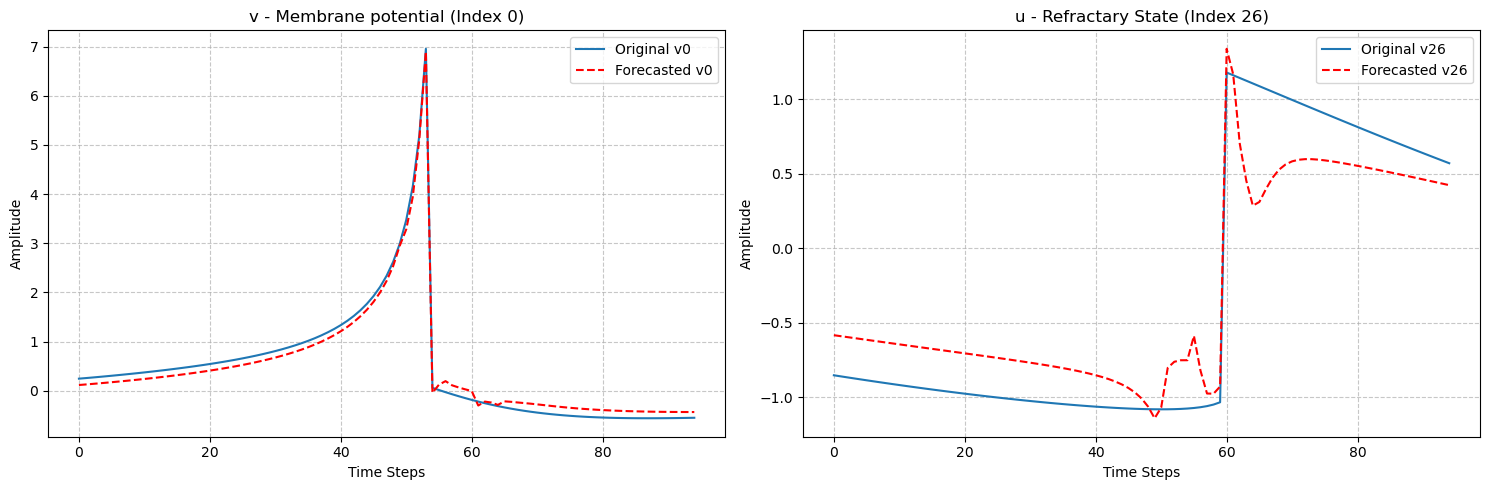

In [103]:
models_data = {
    Constants.v: (y_test, forecast),
   Constants.u: (y_test, forecast)
}

# Indici personalizzati per ogni modello
indices = {
    
    Constants.v: 0,
    Constants.u: 26
    
}

Plotter.plot_multiple_models(models_data, indices=indices, var_name='v')


Let's forecast LIF!

In [104]:
hybrid_model = HybridModel()
x,y = DataHandler._prepare_data(v_lif)
x_train, y_train, x_test, y_test = DataHandler._split_train_test(x,y)

In [105]:
x_error, y_error = DataHandler.create_error_sequences(model_data = v_lif , true_data = v_lif)
model_corrections = hybrid_model._create_gru(len(v_lif[1]),len(v_lif[1]), same_size = True)
optimizer = optim.Adam(model_corrections.parameters(), lr=0.001) 
trained_model_corrections = hybrid_model._train(model_corrections,x_error,y_error,optimizer,epochs = 200 )
forecast = hybrid_model._forecast(trained_model_corrections, x_test, y_test, corrections=True)

[2025-03-15 17:23:30] [INFO] Created GRU network
[2025-03-15 17:23:30] [INFO] Training started..
[2025-03-15 17:23:40] [INFO] Epoch [20/200], Train Loss: 0.0001 
[2025-03-15 17:23:50] [INFO] Epoch [40/200], Train Loss: 0.0000 
[2025-03-15 17:24:00] [INFO] Epoch [60/200], Train Loss: 0.0000 
[2025-03-15 17:24:11] [INFO] Epoch [80/200], Train Loss: 0.0000 
[2025-03-15 17:24:21] [INFO] Epoch [100/200], Train Loss: 0.0000 
[2025-03-15 17:24:30] [INFO] Epoch [120/200], Train Loss: 0.0000 
[2025-03-15 17:24:41] [INFO] Epoch [140/200], Train Loss: 0.0000 
[2025-03-15 17:24:51] [INFO] Epoch [160/200], Train Loss: 0.0000 
[2025-03-15 17:25:01] [INFO] Epoch [180/200], Train Loss: 0.0000 
[2025-03-15 17:25:11] [INFO] Epoch [200/200], Train Loss: 0.0000 
[2025-03-15 17:25:11] [INFO] Training ended


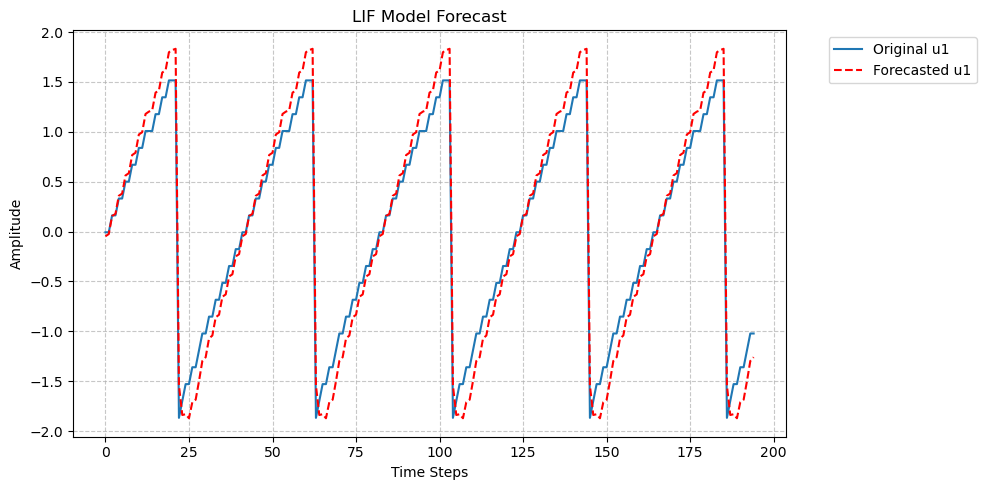

In [108]:
Plotter.plot_data(
    y_test=y_test,
    forecasted=forecast,
    index=1,
    time_steps=y_test.shape[0],
    var_name='u',
    title='LIF Model Forecast'
)